
[![Binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/mmngreco/mmngreco.github.io-source/master/?filepath=content/downloads/notebooks/competencia.ipynb)

Podéis acceder al notebook [aquí](https://github.com/mmngreco/mmngreco.github.io-source/blob/master/content/downloads/notebooks/competencia.ipynb). También podéis ejecutar el notebook online [aquí](https://mybinder.org/v2/gh/mmngreco/mmngreco.github.io-source/master/?filepath=content/downloads/notebooks/competencia.ipynb) o desde el badge al inicio del post. Si veis cualquier error o sugerencia, se aceptan [PR](https://github.com/mmngreco/mmngreco.github.io-source/pulls)! ;-)

# Introducción

Después de mucho tiempo sin escribir, he decidido retomar la divulgación con algo que me parece muy útil, sobre todo durante la carrera me sirvió de gran ayuda, me refiero al cálculo simbólico en Python!

Concretamente, en este post resuelvo un ejercicio muy común en Microeconomía, un mercado en competencia perfecta con varios paises con diferentes tecnologías (costes).

# Mercado Mundial Competitivo

Supongamos un mercado mundial competitivo _[1]_, por un lado tenemos la oferta de cada una de la empresas que forman el mercado de cada país y por otro la demanda mundial.

_[1]: Esto implica que los productores son precio-aceptantes, es decir, que el precio es una variable exógena para los productores._

## La Oferta

Supongamos que la oferta está formada por 3 países con tecnologías diferentes, en cada país hay $N$ empresas cuya tecnología está definida por su curva de costes, como muestra la tabla.

| &nbsp;&nbsp;&nbsp;&nbsp;País&nbsp;&nbsp;&nbsp;&nbsp;  |&nbsp;&nbsp;&nbsp;&nbsp;N empresas&nbsp;&nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;&nbsp;Costes unitarios $C(q_i)$&nbsp;&nbsp;&nbsp;&nbsp;       |
|:---:  |:--------:|:-----------------------------: |
|A      | 100      |$= \frac{q_a^2}{2} + 2q_a + 10$ |
|B      |  50      |$= \frac{q_b^2}{10} + 3q_b + 12$|
|C      | 100      |$= \frac{q_c^2}{2} + 2$         |

## La Demanda

Por otra parte, los consumidores tienen una única demanda mundial y queda representada con la siguiente expresión:

\begin{equation}
Q^D = 98650 - 19350 P
\end{equation}



## Se pide

En un ejercicio típico nos suelen pedir hallar:

- Las cantidades producidas ($q_i$) de la empresa de cada país.
- Beneficios ($\pi_i$)
- Precio de Equilibrio ($p$)



In [1]:
from IPython.display import Markdown
import numpy as np
from sympy import *
import matplotlib.pyplot as plt

In [2]:
init_printing()

In [3]:
%matplotlib inline

Muy bien definido el problema, lo primero que haremos será crear las variables necesarias para resolverlo, esto lo hacemos con la función `symbols`:

In [4]:
# descomentar para ver la ayuda.
# help(symbols)

In [5]:
# Se crean las variables necesarias
qa, qb, qc, q, Qd, P, pi, Q = symbols('q_a q_b q_c q Q^d P p_i Q')

## COSTES

Una vez tenemos las variables vamos a definir la funciones de costes utilizando las variables anteriores.

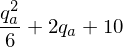

In [6]:
costes_a = qa ** 2 / 6 + 2 * qa + 10
costes_a

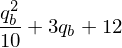

In [7]:
costes_b = qb ** 2 / 10 + 3 * qb + 12
costes_b

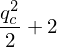

In [8]:
costes_c = qc ** 2 / 2 + 2
costes_c

## DEMANDA

Hacemos lo mismo con la demanda.

In [9]:
q_dda = 98650 - 19350 * P
q_dda

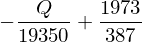

In [10]:
p_dda = solve(Eq(Q, q_dda), P)[-1]
p_dda

## OFERTA

y por último con la oferta.

In [11]:
q_oferta = 100 * qa + 50 * qb + 100 * qc
q_oferta

## Resolución

Una vez definidas todas las funciones ya podemos empezar a resolver el problema aplicando la teoría económica y un poco de programación.

Bien, a partir de los costes podemos calcular los costes marginales, como las empresas son precio-aceptantes se cumple que $P=C'$. Para esto tenemos que calcular la primera derivada de la curva de costes de cada tipo empresa, lo hacemos usando el método `diff()` de las expresiones de los costes.

Por ejemplo, la derivada de los costes de las empresas del país A son:

In [12]:
# descomentar para ver la ayuda.
# help(diff)

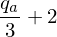

In [13]:
coste_marginal_a = costes_a.diff(qa)
coste_marginal_a

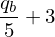

In [14]:
coste_marginal_b = costes_b.diff(qb)
coste_marginal_b

In [15]:
coste_marginal_c = costes_c.diff(qc)
coste_marginal_c

In [16]:
coste_list = [costes_a, costes_b, costes_c]
q_list = [qa, qb, qc]
pais_list = ['a', 'b', 'c']
coste_marginal_list = [coste_marginal_a, coste_marginal_b, coste_marginal_c]

Lista de costes marginales:

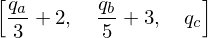

In [17]:
coste_marginal_list

En este punto ya tenemos los costes marginales de la empresas de cada país, lo usaremos para hallar la cantidad que se intercambiará en el equilibrio. Para ello tenemos que igualar los costes marginales y el precio. Para esto vamos a usar una función que nos permite igualar dos expresiones `Eq()`. Con la igualdad podremos despejar la variable que nos interesa ($P$). Para resolver una equación usaremos `solve()` y por último necesitaremos sustituir el valor de `P` en la oferta para tener la cantidad. Iremos por partes, primero igualamos $P = C'_a$

In [18]:
# Descomentar para ver la ayuda.
# help(Eq)
# help(solve)

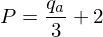

In [19]:
precio_igual_cmg_a = Eq(P, coste_marginal_a)
precio_igual_cmg_a

Despejando de la equación anterior $q_a$ nos queda $q_a(P)$

In [20]:
solucion_a = solve(precio_igual_cmg_a, qa)[-1]
solucion_a

Sustituyendo $q_a$ en la oferta total

In [21]:
q_oferta_parcial = q_oferta.subs(qa, solucion_a)
q_oferta_parcial

Repetimos el proceso con la empresa b, $P = C'_b$

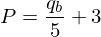

In [22]:
precio_igual_cmg_b = Eq(P, coste_marginal_b)
precio_igual_cmg_b

Despejamos $q_b$

In [23]:
solucion_b = solve(precio_igual_cmg_b, qb)[-1]
solucion_b

Sustituimos $q_b$ de la oferta parcial anterior

In [24]:
q_oferta_parcial = q_oferta_parcial.subs(qb, solucion_b)
q_oferta_parcial

Lo mismo con la última empresa $q_c$

In [25]:
precio_igual_cmg_c = Eq(P, coste_marginal_c)
precio_igual_cmg_c

Despejamos $q_c$

In [26]:
solucion_c = solve(precio_igual_cmg_c, qc)[-1]
solucion_c

Sustituimos $q_c$ en la oferta parcial anterior

In [27]:
q_oferta_parcial = q_oferta_parcial.subs(qc, solucion_c)
q_oferta_parcial

In [28]:
# Nota: ese proceso se podria generalizar.
# alternativamente lo podemos hacer de forma recursiva con un bucle
q_oferta_tmp = q_oferta.copy()
for i in range(len(coste_list)):
    q_oferta_tmp = q_oferta_tmp.subs(q_list[i], solve(Eq(P, coste_marginal_list[i]), q_list[i])[-1])
    print(q_oferta_tmp)

300*P + 50*q_b + 100*q_c - 600
550*P + 100*q_c - 1350
650*P - 1350


En este punto ya tenemos nuestra oferta total que sólo depende de los precios.

In [29]:
q_oferta_final = q_oferta_parcial

In [30]:
q_oferta_final

Resolvemos la equación anterior y obtenemos $P$

In [31]:
precio_equilibrio = solve(Eq(q_dda, q_oferta_final), P)[-1]
precio_equilibrio

Sustituyendo $P$ en la oferta final tenemos $Q$

In [32]:
q_equilibrio = q_oferta_final.subs(P, precio_equilibrio)
q_equilibrio

Como se tiene que cumplir $Q^S = Q^D$

In [33]:
q_dda.subs(P, precio_equilibrio)

## Beneficio

El beneficio de empresa del país $_i$ se puede calcular cómo 

\begin{equation}
\pi_i = IT - CT\\
\pi_i = p*q_i - c_i(q_i)
\end{equation}

Necesitamos conocer la cantidad que produce individualmente cada empresa $q_i$, pero hemos dicho que las empresas son precio-aceptantes, por lo que podemos sustituir el precio que ahora conocemos en la función de coste marignal y obtener las cantidades que produce cada empresa.

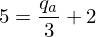

In [34]:
p_igual_cm_a = Eq(precio_equilibrio, coste_marginal_a)
p_igual_cm_a

In [35]:
qa_value = solve(p_igual_cm_a)[-1]
qa_value

El beneficio de las empresas del país $_a$:

In [36]:
pi_a = precio_equilibrio * qa_value - costes_a.subs(qa, qa_value)
pi_a

El mismo proceso es el que hay que sesguir con el resto de empresas.

## RESUMEN DE VARIABLES EN EL EQUILIBRIO

In [37]:
n_empresas = [100, 50, 100]
q_i = []
Q_i = []
b_i = []
n_i = []

table_fmt = """
|{sp}Variables \ Sector{sp}|{sp}a{sp}|{sp}b{sp}|{sp}c{sp}|
|:--    |--:|--:|--:|
|$q =$  |{q_i}|
|$Q =$  |{Q_i}|
|$\pi =$|{b_i}|
"""

for i in range(3):
    qi = solve(Eq(precio_equilibrio, coste_marginal_list[i]), q_list[i])[-1]
    p_igual_cmg = Eq(precio_equilibrio, coste_marginal_list[i])
    b = precio_equilibrio * solve(p_igual_cmg, q_list[i])[-1] - coste_list[i].subs(q_list[i], qi)
    q_i += [qi]
    Q_i += [qi*n_empresas[i]]
    b_i += [b]

display(
    Markdown(
        table_fmt.format(
            q_i="|".join(map(str,q_i)), 
            Q_i="|".join(map(str,Q_i)), 
            b_i="|".join(map(str,b_i)),
            sp="&nbsp;"*4
        )
    ))


|&nbsp;&nbsp;&nbsp;&nbsp;Variables \ Sector&nbsp;&nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;&nbsp;a&nbsp;&nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;&nbsp;b&nbsp;&nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;&nbsp;c&nbsp;&nbsp;&nbsp;&nbsp;|
|:--    |--:|--:|--:|
|$q =$  |9|10|5|
|$Q =$  |900|500|500|
|$\pi =$|7/2|-2|21/2|


## Graficamente

Despejamos el precio de la oferta para tener la función inversa de demanda:

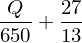

In [38]:
p_oferta = solve(Eq(Q, q_oferta_final), P)[-1]
p_oferta

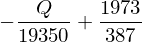

In [39]:
p_dda

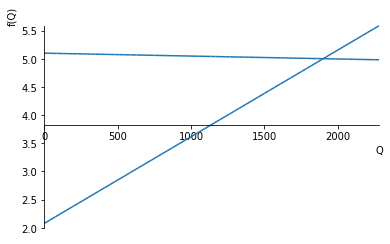

In [40]:
limits = (Q, 0, q_equilibrio*1.2)
plot(p_dda, p_oferta, limits);